In [2]:
import pandas as pd
import numpy as np

In [3]:
df_cf = pd.read_csv("..\data\df_cf_forpredictions.csv")
df_cf['year'] = pd.to_datetime(df_cf['year'])


SARIMAX

In [4]:
#till 2018 - train
from datetime import datetime
from dateutil.rrule import rrule, YEARLY
from dateutil import tz
from statsmodels.tsa.statespace.sarimax import SARIMAX
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df_1 = df_cf.set_index(['year'])
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict  = {}
def sarimax_preds(df, column_name):
    df = pd.DataFrame(df)
    df.columns = [column_name]

    df.index = pd.to_datetime(df.index)  # Convert the index to datetime if not already done

    # Split the data until 2018 for training
    train_data = df.loc[:'2018']

    y_train = train_data[column_name]
    SARIMAXmodel = SARIMAX(y_train, order=(6, 0, 6), seasonal_order=(5, 4, 10, 15))
    SARIMAXmodel = SARIMAXmodel.fit()

    # Predict from 2018 to 2022
    predicted_dates = pd.date_range(start='2018-03-01', end='2022-03-01', freq='AS-MAR')
    y_pred = SARIMAXmodel.get_forecast(steps=len(predicted_dates))
    y_pred_df = y_pred.conf_int(alpha=0.05)
    y_pred_df["Predictions"] = SARIMAXmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])

    y_pred_df.index = predicted_dates
    y_pred_out = y_pred_df["Predictions"]

    predictions_df[column_name] = y_pred_out
    predictions_dict[column_name] = y_pred_out

    # Calculate the root mean square error (RMSE)
    actual_values = df.loc['2018-03-01':'2022-03-01'][column_name]
    error = actual_values - y_pred_out
    rmse = np.sqrt(np.mean(error**2))
    error_dict[column_name] = rmse


columns_to_predict = df_1.columns[1:]  # Exclude the 'year' column
for column_name in columns_to_predict:
    sarimax_preds(df_1[column_name], column_name)

error_dict

{'Net Profit/Loss Before Extraordinary Items And Tax': 2664.6664185731343,
 'Net CashFlow From Operating Activities': 921.3041174414482,
 'Net Cash Used In Investing Activities': 3907.7360525549852,
 'Net Cash Used From Financing Activities': 3919.033112399919,
 'Net Inc/Dec In Cash And Cash Equivalents': 2075.621889239184,
 'Cash And Cash Equivalents Begin of Year': 2595.6767388723274,
 'Cash And Cash Equivalents End Of Year': 3060.318354602465}

In [5]:
#till 2016 - train
from datetime import datetime
from dateutil.rrule import rrule, YEARLY
from dateutil import tz
from statsmodels.tsa.statespace.sarimax import SARIMAX
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df_1 = df_cf.set_index(['year'])
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict  = {}
def sarimax_preds(df, column_name):
    df = pd.DataFrame(df)
    df.columns = [column_name]

    df.index = pd.to_datetime(df.index)  # Convert the index to datetime if not already done

    # Split the data until 2016 for training
    train_data = df.loc[:'2016']

    y_train = train_data[column_name]
    SARIMAXmodel = SARIMAX(y_train, order=(6, 0, 6), seasonal_order=(5, 4, 10, 15))
    SARIMAXmodel = SARIMAXmodel.fit()

    # Predict from 2016 to 2022
    predicted_dates = pd.date_range(start='2016-03-01', end='2022-03-01', freq='AS-MAR')
    y_pred = SARIMAXmodel.get_forecast(steps=len(predicted_dates))
    y_pred_df = y_pred.conf_int(alpha=0.05)
    y_pred_df["Predictions"] = SARIMAXmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])

    y_pred_df.index = predicted_dates
    y_pred_out = y_pred_df["Predictions"]

    predictions_df[column_name] = y_pred_out
    predictions_dict[column_name] = y_pred_out

    # Calculate the root mean square error (RMSE)
    actual_values = df.loc['2016-03-01':'2022-03-01'][column_name]
    error = actual_values - y_pred_out
    rmse = np.sqrt(np.mean(error**2))
    error_dict[column_name] = rmse


columns_to_predict = df_1.columns[1:]  # Exclude the 'year' column
for column_name in columns_to_predict:
    sarimax_preds(df_1[column_name], column_name)

error_dict

{'Net Profit/Loss Before Extraordinary Items And Tax': 2041.4387725111173,
 'Net CashFlow From Operating Activities': 1185.1462936142739,
 'Net Cash Used In Investing Activities': 3710.241996133164,
 'Net Cash Used From Financing Activities': 2514.3747043632507,
 'Net Inc/Dec In Cash And Cash Equivalents': 1426.7236764119796,
 'Cash And Cash Equivalents Begin of Year': 2256.349748491324,
 'Cash And Cash Equivalents End Of Year': 2781.290717888521}

In [6]:
#till 2014 - train
from datetime import datetime
from dateutil.rrule import rrule, YEARLY
from dateutil import tz
from statsmodels.tsa.statespace.sarimax import SARIMAX
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df_1 = df_cf.set_index(['year'])
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict  = {}
def sarimax_preds(df, column_name):
    df = pd.DataFrame(df)
    df.columns = [column_name]

    df.index = pd.to_datetime(df.index)  # Convert the index to datetime if not already done

    # Split the data until 2014 for training
    train_data = df.loc[:'2014-03-01']

    y_train = train_data[column_name]
    SARIMAXmodel = SARIMAX(y_train, order=(6, 0, 6), seasonal_order=(5, 4, 10, 15))
    SARIMAXmodel = SARIMAXmodel.fit()

    # Predict from 2014 to 2022
    predicted_dates = pd.date_range(start='2014-03-01', end='2022-03-01', freq='AS-MAR')
    y_pred = SARIMAXmodel.get_forecast(steps=len(predicted_dates))
    y_pred_df = y_pred.conf_int(alpha=0.05)
    y_pred_df["Predictions"] = SARIMAXmodel.predict(start=y_pred_df.index[0], end=y_pred_df.index[-1])

    y_pred_df.index = predicted_dates
    y_pred_out = y_pred_df["Predictions"]

    predictions_df[column_name] = y_pred_out
    predictions_dict[column_name] = y_pred_out

    # Calculate the root mean square error (RMSE)
    actual_values = df.loc['2014-03-01':'2022-03-01'][column_name]
    error = actual_values - y_pred_out
    rmse = np.sqrt(np.mean(error**2))
    error_dict[column_name] = rmse


columns_to_predict = df_1.columns[1:]  # Exclude the 'year' column
for column_name in columns_to_predict:
    sarimax_preds(df_1[column_name], column_name)

error_dict

{'Net Profit/Loss Before Extraordinary Items And Tax': 1877.0919456309862,
 'Net CashFlow From Operating Activities': 1439.3757203956466,
 'Net Cash Used In Investing Activities': 4564.607727407793,
 'Net Cash Used From Financing Activities': 3863.8004774566743,
 'Net Inc/Dec In Cash And Cash Equivalents': 1158.970024594439,
 'Cash And Cash Equivalents Begin of Year': 2100.783292356898,
 'Cash And Cash Equivalents End Of Year': 2491.9998990275367}

In [7]:
"""from statsmodels.tsa.vector_ar.var_model import VAR

df_1 = df_cf.set_index('year')

# Initialize dictionary to store predictions and errors
predictions_dict = {}
error_dict = {}

def var_preds(df, column_name):
    # Prepare data for VAR modeling
    df.index = pd.to_datetime(df.index)  # Convert the index to datetime
    
    # Split the data until 2018 for training
    train_data = df.loc[:'2018-03-01']

    # Fit VAR model
    model = VAR(train_data)
    model_fit = model.fit()

    # Make predictions from 2018-03-01 to 2022-03-01
    y_pred = model_fit.forecast(model_fit.endog, steps=len(df) - len(train_data))
    y_pred_df = pd.DataFrame(y_pred, columns=df.columns)

    # Calculate the root mean square error (RMSE)
    actual_values = df.loc['2018-03-01':'2022-03-01', column_name]
    predicted_values = y_pred_df[column_name].loc['2018-03-01':'2022-03-01']
    error = actual_values - predicted_values
    rmse = np.sqrt(np.mean(error**2))
    error_dict[column_name] = rmse

    # Store the predictions in the dictionary
    predictions_dict[column_name] = predicted_values


columns_to_predict = df_1.columns[1:]  # Exclude the 'year' column
for column_name in columns_to_predict:
    var_preds(df_1[[column_name]], column_name)

error_dict"""


"from statsmodels.tsa.vector_ar.var_model import VAR\n\ndf_1 = df_cf.set_index('year')\n\n# Initialize dictionary to store predictions and errors\npredictions_dict = {}\nerror_dict = {}\n\ndef var_preds(df, column_name):\n    # Prepare data for VAR modeling\n    df.index = pd.to_datetime(df.index)  # Convert the index to datetime\n    \n    # Split the data until 2018 for training\n    train_data = df.loc[:'2018-03-01']\n\n    # Fit VAR model\n    model = VAR(train_data)\n    model_fit = model.fit()\n\n    # Make predictions from 2018-03-01 to 2022-03-01\n    y_pred = model_fit.forecast(model_fit.endog, steps=len(df) - len(train_data))\n    y_pred_df = pd.DataFrame(y_pred, columns=df.columns)\n\n    # Calculate the root mean square error (RMSE)\n    actual_values = df.loc['2018-03-01':'2022-03-01', column_name]\n    predicted_values = y_pred_df[column_name].loc['2018-03-01':'2022-03-01']\n    error = actual_values - predicted_values\n    rmse = np.sqrt(np.mean(error**2))\n    error_dic

MLP Regressor

In [8]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df_1 = df_cf.set_index('year')
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict = {}

def mlp_regressor_preds(df, column_name):
    X_train = df.loc[:'2018-03-01'].drop(column_name, axis=1)
    y_train = df.loc[:'2018-03-01', column_name]
    X_test = df.loc['2018-03-01':].drop(column_name, axis=1)

    mlp_regressor = MLPRegressor(hidden_layer_sizes=(80,40), activation='relu', random_state=45, solver = "lbfgs", alpha=True, learning_rate="adaptive")
    mlp_regressor.fit(X_train, y_train)

    y_pred = mlp_regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(df.loc['2018-03-01':, column_name], y_pred))

    return rmse

columns_to_predict = df_1.columns[1:]  # Exclude the 'year' column

for column_name in columns_to_predict:
    rmse = mlp_regressor_preds(df_1, column_name)
    error_dict[column_name] = rmse

error_dict

{'Net Profit/Loss Before Extraordinary Items And Tax': 6577.996800895229,
 'Net CashFlow From Operating Activities': 461.7352087546248,
 'Net Cash Used In Investing Activities': 503.2284196313414,
 'Net Cash Used From Financing Activities': 84.60130110968666,
 'Net Inc/Dec In Cash And Cash Equivalents': 703.0615403846807,
 'Cash And Cash Equivalents Begin of Year': 540.3825440181748,
 'Cash And Cash Equivalents End Of Year': 557.4286516110297}

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
warnings.filterwarnings("ignore")

df_1 = df_cf.set_index('year')
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict = {}

def mlp_regressor_preds(df, column_name):
    X_train = df.loc[:'2016-03-01'].drop(column_name, axis=1)
    y_train = df.loc[:'2016-03-01', column_name]
    X_test = df.loc['2016-03-01':].drop(column_name, axis=1)

    mlp_regressor = MLPRegressor(hidden_layer_sizes=(40,20), activation='relu', random_state=45, solver = "lbfgs", alpha=True, learning_rate="adaptive")
    mlp_regressor.fit(X_train, y_train)

    y_pred = mlp_regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(df.loc['2016-03-01':, column_name], y_pred))

    return rmse

columns_to_predict = df_1.columns[1:]  # Exclude the 'year' column

for column_name in columns_to_predict:
    rmse = mlp_regressor_preds(df_1, column_name)
    error_dict[column_name] = rmse

error_dict

{'Net Profit/Loss Before Extraordinary Items And Tax': 8852.383129124428,
 'Net CashFlow From Operating Activities': 364.14950908783914,
 'Net Cash Used In Investing Activities': 365.25387728723325,
 'Net Cash Used From Financing Activities': 455.4466399172811,
 'Net Inc/Dec In Cash And Cash Equivalents': 1239.59442491022,
 'Cash And Cash Equivalents Begin of Year': 450.54544483555946,
 'Cash And Cash Equivalents End Of Year': 358.4783160758836}

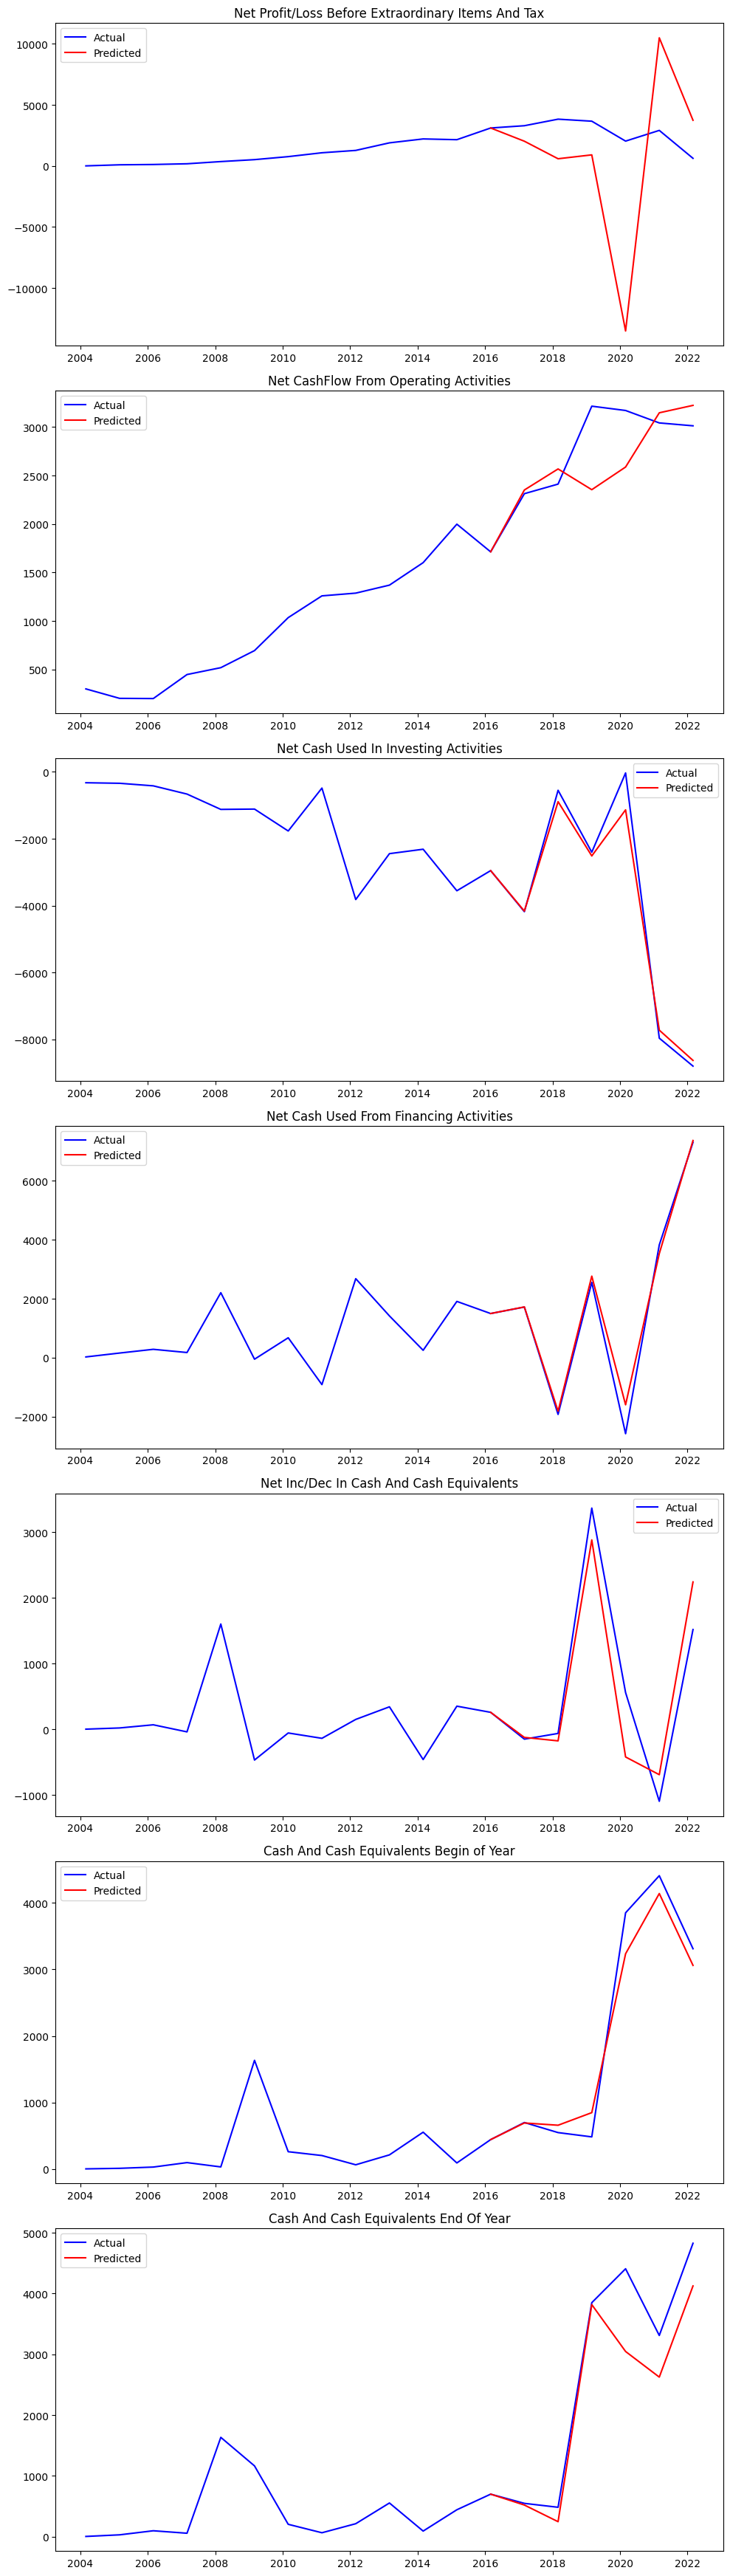

In [10]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

df_1 = df_cf.set_index('year')
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict = {}

def mlp_regressor_preds(df, column_name):
    X_train = df.loc[:'2016-03-01'].drop(column_name, axis=1)
    y_train = df.loc[:'2016-03-01', column_name]
    X_test = df.loc['2016-03-01':].drop(column_name, axis=1)

    mlp_regressor = MLPRegressor(hidden_layer_sizes=(80, 40), activation='relu', random_state=45, solver="lbfgs",
                                 alpha=True, learning_rate="adaptive")
    mlp_regressor.fit(X_train, y_train)

    y_pred = mlp_regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(df.loc['2016-03-01':, column_name], y_pred))

    return y_pred, rmse

columns_to_predict = df_1.columns[1:]  # Exclude the 'year' column

fig, axes = plt.subplots(len(columns_to_predict), 1, figsize=(10, 5 * len(columns_to_predict)))

for i, column_name in enumerate(columns_to_predict):
    y_pred, rmse = mlp_regressor_preds(df_1, column_name)
    error_dict[column_name] = rmse

    ax = axes[i]
    ax.plot(df_1.index, df_1[column_name], color='blue', label='Actual')
    ax.plot(df_1.loc['2016-03-01':].index, y_pred, color='red', label='Predicted')
    ax.set_title(column_name)
    ax.legend()

plt.tight_layout()
plt.show()


In [11]:

# 80-20 split MLPregresssor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

df_1 = df_cf.set_index('year')
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict = {}

def mlp_regressor_preds(df, column_name):
    X = df.drop(column_name, axis=1)
    y = df[column_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

    mlp_regressor = MLPRegressor(hidden_layer_sizes=(80, 40), activation='relu', random_state=45, solver="lbfgs",
                                 alpha=True, learning_rate="adaptive")
    mlp_regressor.fit(X_train, y_train)

    y_pred = mlp_regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return rmse

columns_to_predict = df_1.columns[1:]  # Exclude the 'months' column

for column_name in columns_to_predict:
    rmse = mlp_regressor_preds(df_1, column_name)
    error_dict[column_name] = rmse

error_dict


{'Net Profit/Loss Before Extraordinary Items And Tax': 752.5221971957568,
 'Net CashFlow From Operating Activities': 227.78399658246647,
 'Net Cash Used In Investing Activities': 636.5109154573582,
 'Net Cash Used From Financing Activities': 290.9936398649009,
 'Net Inc/Dec In Cash And Cash Equivalents': 393.63482240858053,
 'Cash And Cash Equivalents Begin of Year': 272.7857334140002,
 'Cash And Cash Equivalents End Of Year': 575.4219772217339}

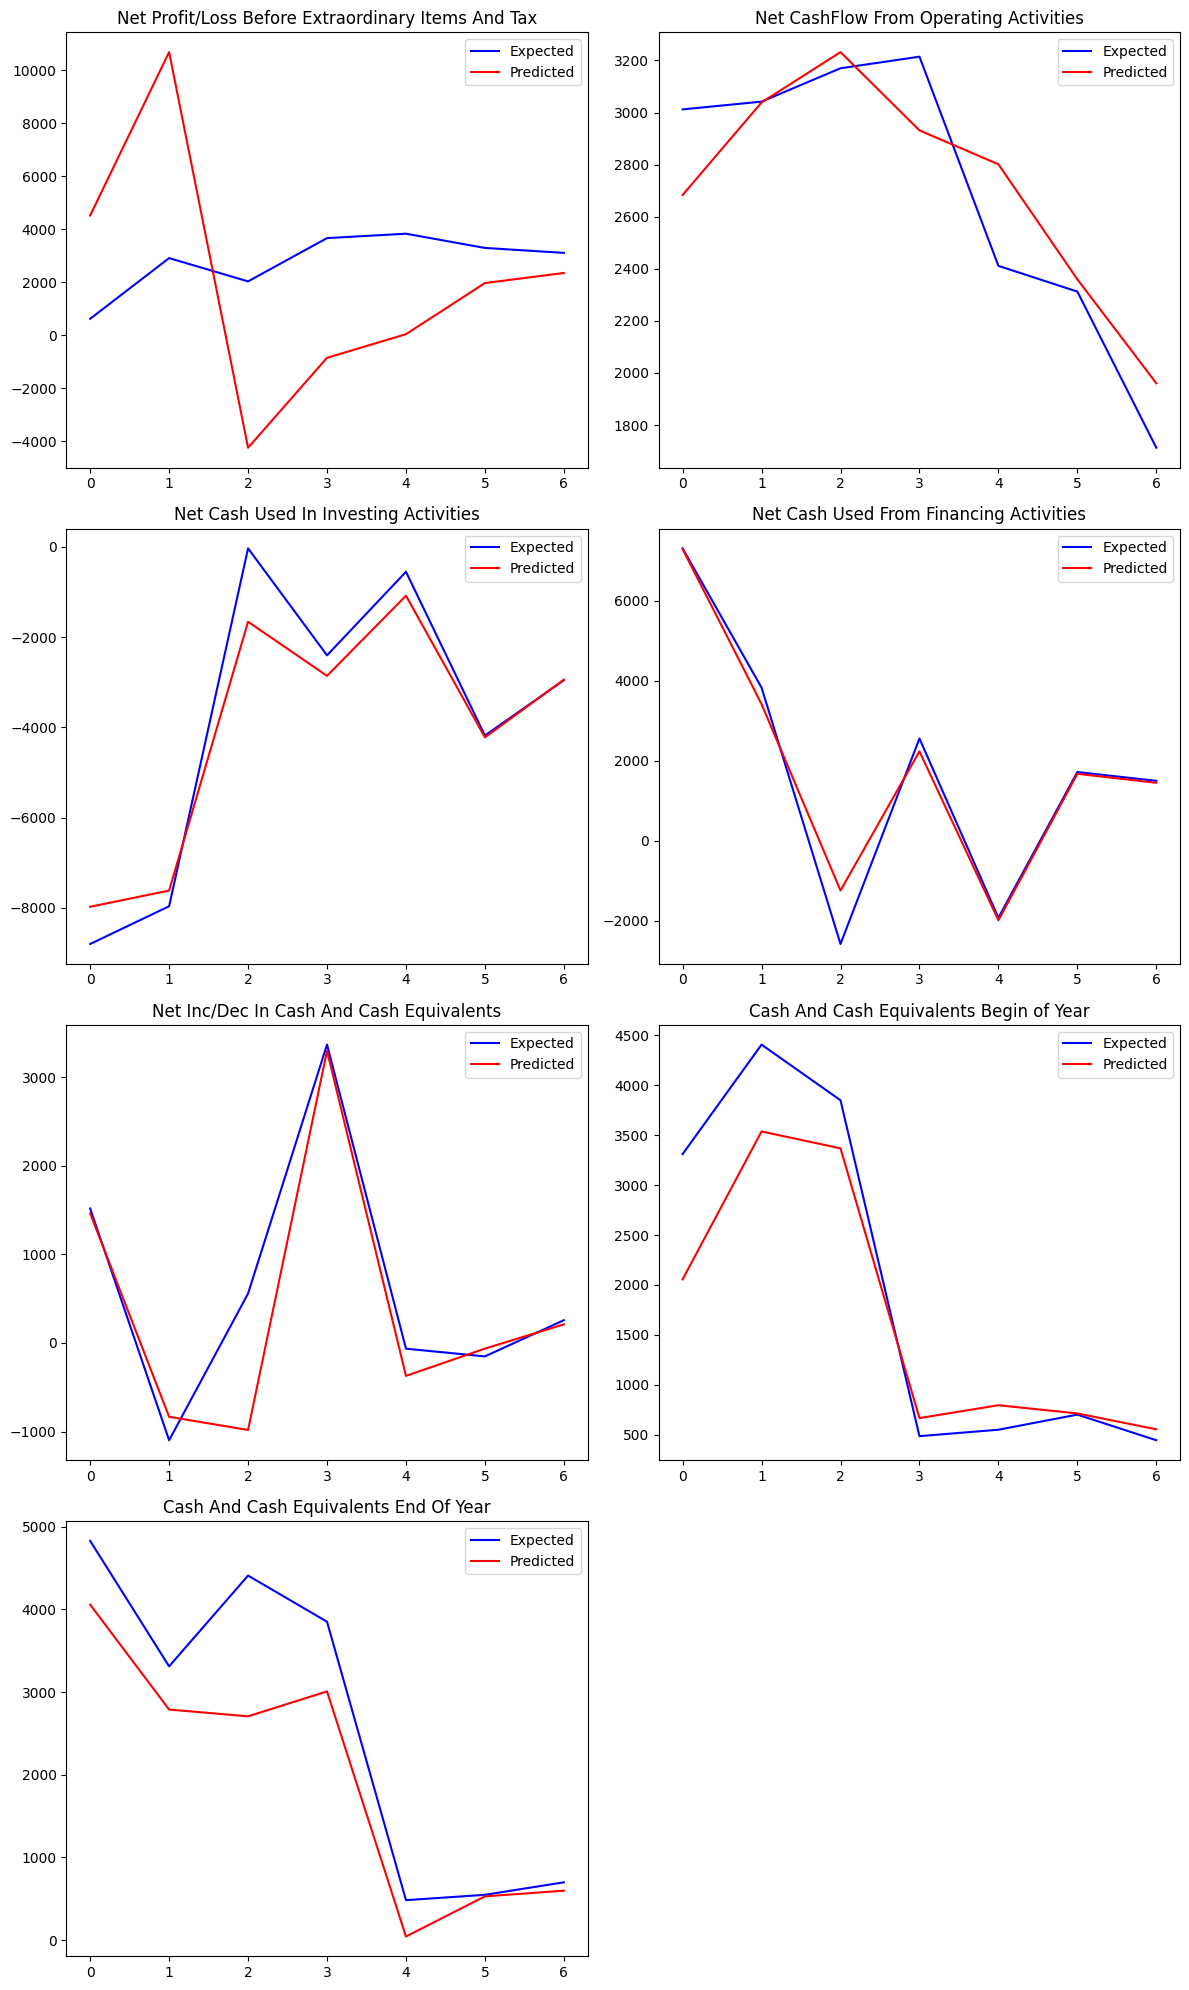

RMSE for Net Profit/Loss Before Extraordinary Items And Tax: 4657.4865
RMSE for Net CashFlow From Operating Activities: 241.2991
RMSE for Net Cash Used In Investing Activities: 750.1942
RMSE for Net Cash Used From Financing Activities: 543.5492
RMSE for Net Inc/Dec In Cash And Cash Equivalents: 603.8226
RMSE for Cash And Cash Equivalents Begin of Year: 617.7587
RMSE for Cash And Cash Equivalents End Of Year: 817.3467


In [34]:

from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

warnings.filterwarnings("ignore")

df_1 = df_cf.set_index('year')
predictions_df = pd.DataFrame(index=df_1.index)
predictions_dict = {}
error_dict = {}
rmse_dict = {}  # New dictionary to store RMSE values

def mlp_regressor_preds(df, column_name):
    test_size = int(len(df) * 0.4)
    X_train = df.iloc[test_size:].drop(column_name, axis=1)
    y_train = df.iloc[test_size:][column_name]
    X_test = df.iloc[:test_size].drop(column_name, axis=1)
    y_test = df.iloc[:test_size][column_name]

    mlp_regressor = MLPRegressor(hidden_layer_sizes=(20,40,30), activation='relu', random_state=45, solver="lbfgs",
                                 alpha=True, learning_rate="adaptive")
    mlp_regressor.fit(X_train, y_train)

    y_pred = mlp_regressor.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return y_test, y_pred, rmse

columns_to_predict = df_1.columns[1:]  # Exclude the 'months' column

num_columns = len(columns_to_predict)
num_rows = (num_columns + 1) // 2  # Adjust the number of rows for a grid layout

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))
axes = axes.flatten()

for i, column_name in enumerate(columns_to_predict):
    y_test, y_pred, rmse = mlp_regressor_preds(df_1, column_name)
    error_dict[column_name] = rmse
    rmse_dict[column_name] = rmse  # Store RMSE value in the dictionary

    ax = axes[i]
    ax.plot(range(len(y_test)), y_test, color='blue', label='Expected')
    ax.plot(range(len(y_test)), y_pred, color='red', label='Predicted')
    ax.set_title(column_name)
    ax.legend()

# Remove any unused subplots
if num_columns < len(axes):
    for j in range(num_columns, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Print the RMSE values
for column_name, rmse in rmse_dict.items():
    print(f"RMSE for {column_name}: {round(rmse,4)}")